# Power law / Gamma transform คืออะไร
- นิยาม: เป็นการเปลี่ยนค่าสี/ความเข้มตามสมการ s = c * r^γ โดย r คือค่าพิกเซล (normalized), γ (gamma) คือตัวกำหนดลักษณะการดัดแปลง และ c เป็นค่าสเกล (มัก =1)
ความหมายเชิงภาพ:
    - γ < 1 → ทำให้ภาพสว่างขึ้น (ยกค่าต่ำขึ้นมากกว่า)
    - γ = 1 → ไม่มีการเปลี่ยนแปลง
    - γ > 1 → ทำให้ภาพมืดลง (ยกค่าสูงลดลง)
- การใช้งาน: ปรับความสว่าง/contrast แบบ non-linear, การแก้ encoding/gamma ของจอ/กล้อง, และเป็นส่วนหนึ่งของการ enhancement

ขั้นตอนปฏิบัติจริง (สำคัญ)

1. แปลงเป็น float และ normalize เป็นช่วง [0,1] (r = img/255.0)
2. ใช้ s = rgamma (หรือ s = c * rgamma)
3. คูณกลับเป็น [0,255], np.clip, แล้วแปลงเป็น uint8 ก่อนแสดง/บันทึก

- Enhancement (ในการประมวลผลภาพ) คือ การปรับปรุงคุณภาพหรือคุณสมบัติของภาพเพื่อให้ “ดูดีขึ้น” หรือเหมาะกับการนำไปใช้งานต่อ (เช่น วิเคราะห์/segmentation/visualization) เป้าหมาย: เพิ่มความชัด, คอนทราสต์, ความสว่าง, ลด noise, ปรับสี

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([i/255.0 for i in range(256)]) #มีสมาชิก 256 ตัว ตั้งแต่ 0.0 ถึง 1.0
gamma = 2  # > 1 ทำให้มืดลง
y = np.power(x, gamma) #ยกกำลัง 1 or x**1

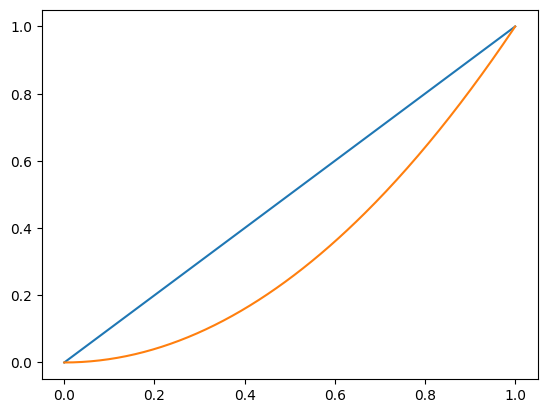

In [9]:
plt.plot(x,x,x,y) 
plt.show()

In [10]:
x = 180
xn = x / 255.0
gamma = 2
y = xn**gamma

print(f'เมื่อ x = {x} (หรือ {xn} ในช่วง [0,1]) และ gamma(power) = {gamma} จะได้ y*255 = {y*255}') 
#ค่าลดลงทั้งๆที่ กำลัง > 1 เพราะว่าค่า xn ที่ทำการnormalize อยู่ในช่วง [0,1] มีค่าน้อยกว่า 1 เมื่อคืนค่ากลับ y *255 จะได้ค่าน้อยลง


เมื่อ x = 180 (หรือ 0.7058823529411765 ในช่วง [0,1]) และ gamma(power) = 2 จะได้ y*255 = 127.05882352941178


# การใช้รูป plot บนกราฟ

In [ ]:
import cv2 #รองรับการเรียงเเบบ BGR

img = cv2.imread('../week1/week_introduction/mandril_color.png') 
# เป็นการเขียนเอง
b = img[:,:,0] #channel blue
g = img[:,:,1] #channel green
r = img[:,:,2] #channel red

# b,g,r = cv2.split(img) แยก channel ด้วยฟังก์ชัน
rgb_img = cv2.merge([r,g,b]) # แปลงเป็น RGB สำหรับ matplotlib

print(f"img type: {type(img)}")  
print(f"img shape: {img.shape}")  

img type: <class 'numpy.ndarray'>
img shape: (512, 512, 3)


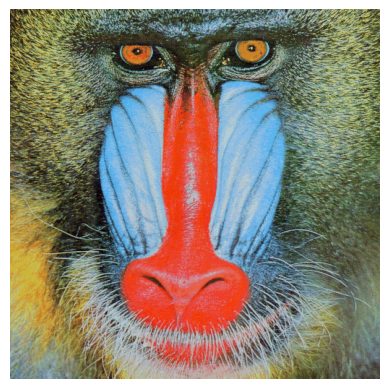

In [12]:
plt.imshow(rgb_img) #รองรับการเรียงเเบบ RGB 
plt.axis('off')#ปิดแกน x,y
plt.show()

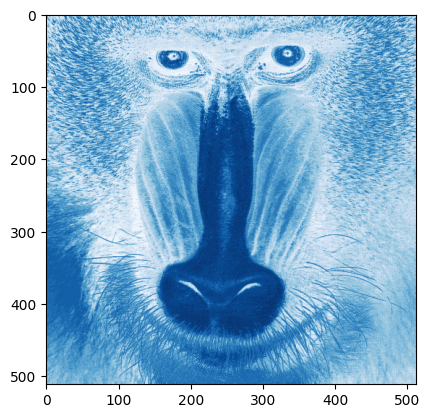

In [13]:
plt.imshow(img[:,:,2], cmap='Blues') #แสดงเเบบ blue scale
plt.show()

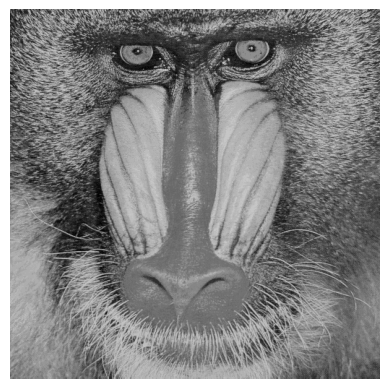

In [ ]:
# ถ้าต้องการแสดงเป็น grayscale ให้แปลงก่อนแล้วใช้ cmap
# cmap ใช้กับภาพ 2D (grayscale) หรือเมื่อต้องการโทนสีพิเศษ; ระวังไม่ใส่ cmap กับภาพ 3-channel
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# การปรับภาพ Brightness

- rgb/np.amax(rgb)
แบ่งทุกพิกเซลด้วยค่าสูงสุดของอาเรย์ (np.amax) เพื่อ normalize ให้ค่าระหว่าง 0–1 (global max)
- np.amax(rgb) คือค่าสูงสุดทั้งภาพ (ข้ามช่อง) — ถ้าอยาก normalize ตามช่วงมาตรฐานควรใช้ 255.0
    - np.amax(rgb) คืนค่า scalar ที่เป็นค่ามากที่สุดในอาเรย์ทั้งหมด (ค้นข้ามทั้งแกนและทั้งช่อง) เช่น ถ้า rgb เป็น uint8 ภาพปกติ จะได้ค่าระหว่าง 0–255 (เช่น 255)
    - ถ้าอาเรย์เป็น float ที่ normalized แล้ว ค่าอาจเป็น 1.0 (หรือค่าสูงสุดจริงในอาเรย์)
    - ถ้าเป็นภาพมืดสุดค่าจะเป็น 0 → ระวังหารด้วยค่านี้ (division by zero)

# Increase brightness

In [15]:
img = cv2.imread("./images/dark.jpg")
b, g, r = cv2.split(img)
rgb = cv2.merge([r, g, b])

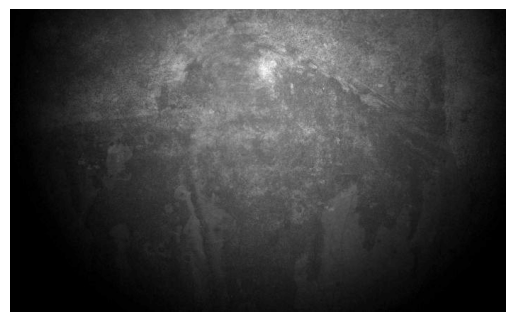

In [ ]:
# ถูกต้อง: normalize -> power -> scale -> clip(เอาไว้เช็คไม่ให้เกิน 255) -> uint8
gamma = 0.99999 # ปรับค่า gamma เพื่อเพิ่มความสว่าง
img_new = (rgb/np.amax(rgb))**gamma *255.0
img_new = img_new.astype(np.uint8)

#cv2.imshow("Enhanced Image", img_new)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

plt.imshow(img_new)
plt.axis('off')
plt.show()

# Decrease brightness

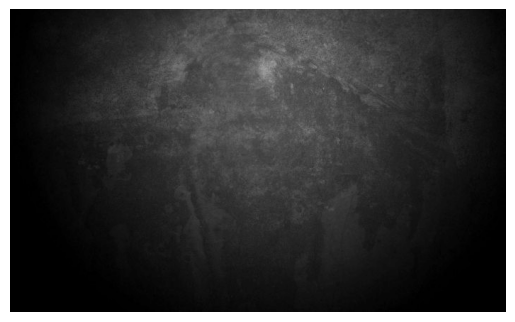

In [ ]:
gamma = 1.1 # ปรับค่า gamma เพื่อเพิ่มความมืด
img_new = (rgb/np.amax(rgb))**gamma *255.0
img_new = img_new.astype(np.uint8)
plt.imshow(img_new)
plt.axis('off')
plt.show()
